Совет от профи: упрощение создания детерминистических 
переменных с помощью класса Lambda

In [217]:
import numpy as np
import pymc as pm

N = 10

beta = pm.Normal("coefficients", 0, size=(N,1))
x = np.random.randn(1, N) # Массив случайных значений со стандартным нормальным распределением. 
linear_combination = pm.Lambda(lambda x=x, beta=beta: np.dot(x.T, beta))


TypeError: __init__() missing 1 required positional argument: 'lam_fun'

In [218]:
beta.value

array([[ -1.915],
       [-22.801],
       [ -1.577],
       [ 13.078],
       [-51.822],
       [ -9.551],
       [-30.922],
       [  9.238],
       [ 31.867],
       [-47.8  ]])

In [216]:
?? pm.Lambda

In [50]:
x = np.random.randn(3,3)
x, x.T # массив.T - транспонирование массива

(array([[ 0.503,  1.619,  0.413],
        [ 0.979, -1.079,  0.771],
        [-0.352, -0.251,  0.21 ]]),
 array([[ 0.503,  0.979, -0.352],
        [ 1.619, -1.079, -0.251],
        [ 0.413,  0.771,  0.21 ]]))

Совет от профи: массивы переменных PyMC

In [2]:
import numpy as np
import pymc as pm

N = 10
x = np.empty(N, dtype=object)
for i in range(0, N):
    x[i] = pm.Exponential('x_%i' %i, (i+1)**2)

for i in range(0, N):
    print(x[i].value)

0.3728028014164757
0.38207436184597116
0.07421237066788723
0.009147200187743988
0.07884745530992267
0.0471864824308441
0.005415967960379944
0.0026188990689381265
0.01794387501003591
0.018111701588103594


2.2.10.  Пример: катастрофа космического 
челнока «Челленджер»

Температура (F), отказ уплотнительного кольца?


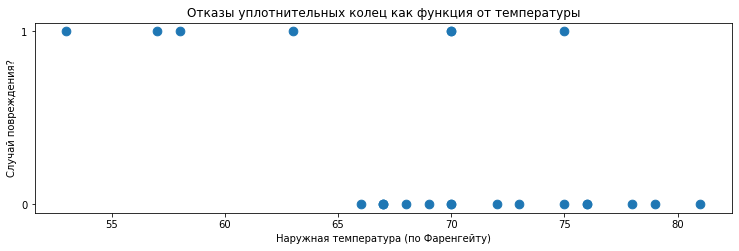

In [122]:
%matplotlib inline
import pymc as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True) # precision - число знаков после запятой, suppress=True - числа будут печататься с запятой
# Если массив слишком велик для печати, 
# NumPy автоматически пропускает центральную часть массива и 
# печатает только углы: Чтобы NumPy печатал весь массив, 
# вы можете изменить параметры печати, используя set_printoptions.

challenger_data = np.genfromtxt("data/challenger_data.csv",
                                skip_header=1, usecols=[1, 2],
                                missing_values="NA",
                                delimiter=",") # чтение csv-файла
# Отбрасываем значения NA.
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]
# Строим график как функцию температуры (первый столбец).
print ("Температура (F), отказ уплотнительного кольца?")
# print (challenger_data)
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75)#, color="k", alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Случай повреждения?")
plt.xlabel("Наружная температура (по Фаренгейту)")
plt.title("Отказы уплотнительных колец как функция от температуры");

In [ ]:
#===============================================================================================

In [104]:
# разбираем процедуру бинарной фильтрации массива данных из файла

import numpy as np

challenger_data = np.genfromtxt("data/challenger_data.csv",
                                skip_header=1, usecols=[1, 2],
                                missing_values="NA",
                                delimiter=",") # чтение csv-файла:
'''
колонки
0    1           2   
---------------------------------
Date,Temperature,Damage Incident
04/12/1981,66,0
11/12/1981,70,1
3/22/82,69,0
6/27/82,80,NA
01/11/1982,68,0
04/04/1983,67,0
6/18/83,72,0
8/30/83,73,0
11/28/83,70,0
02/03/1984,57,1
04/06/1984,63,1
8/30/84,70,1
10/05/1984,78,0
11/08/1984,67,0
1/24/85,53,1
04/12/1985,67,0
4/29/85,75,0
6/17/85,70,0
7/29/85,81,0
8/27/85,76,0
10/03/1985,79,0
10/30/85,75,1
11/26/85,76,0
01/12/1986,58,1
1/28/86,31,Challenger Accident
-------------------------------
'''
# Отбрасываем значения NA.
#challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]
challenger_data[:, 0], challenger_data[:,1]  # доступ к данным 1-го и 2-го столбцов

(array([66., 70., 69., 80., 68., 67., 72., 73., 70., 57., 63., 70., 78.,
        67., 53., 67., 75., 70., 81., 76., 79., 75., 76., 58., 31.]),
 array([ 0.,  1.,  0., nan,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., nan]))

In [54]:
~np.isnan(challenger_data[:, 1])

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [63]:
#challenger_data[~np.isnan(challenger_data[:, 1])] # бинарная фильтрация массива данных таблицы!!!

In [105]:
alist = [ False,  False,  False, False,  False,  True,  False,  False,  True,
        False,  False,  False,  False,  False,  False,  False,  False,  True,
        True,  False,  False,  False,  False,  False, False]

print('True =', alist.count(True),', False =', alist.count(False))

alist = np.array(alist)

print(~alist) # обращение бинарного массива

challenger_data[alist], challenger_data[~alist] # бинарная фильтрация через alist и ~alist

True = 4 , False = 21
[ True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True]


(array([[67.,  0.],
        [70.,  0.],
        [70.,  0.],
        [81.,  0.]]),
 array([[66.,  0.],
        [70.,  1.],
        [69.,  0.],
        [80., nan],
        [68.,  0.],
        [72.,  0.],
        [73.,  0.],
        [57.,  1.],
        [63.,  1.],
        [70.,  1.],
        [78.,  0.],
        [67.,  0.],
        [53.,  1.],
        [67.,  0.],
        [75.,  0.],
        [76.,  0.],
        [79.,  0.],
        [75.,  1.],
        [76.,  0.],
        [58.,  1.],
        [31., nan]]))

In [107]:
challenger_data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [80., nan],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.],
       [31., nan]])

([<matplotlib.axis.YTick at 0xeca18b0>, <matplotlib.axis.YTick at 0x5975fa0>],
 [Text(0, 0, ''), Text(0, 0, '')])

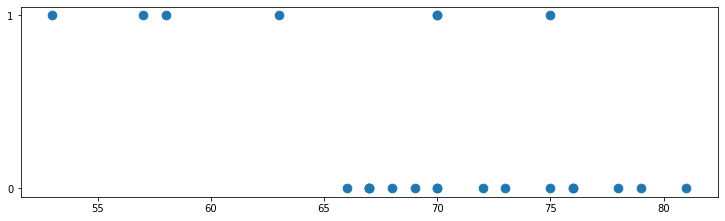

In [106]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5, 3.5)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75)
plt.yticks([0, 1])

In [ ]:
#==============================================================================================

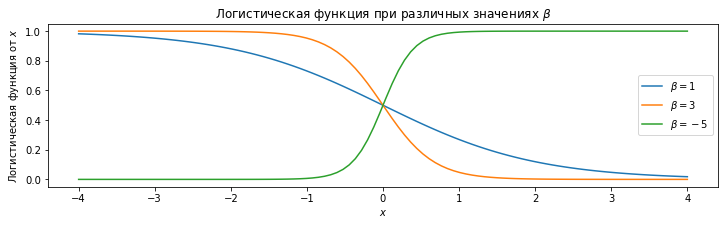

In [123]:
%matplotlib inline
import pymc as pm
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12, 3)
def logistic(x, beta): # формула логистической функции
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100) # 100 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, logistic(x, 1), label= r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label= r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label= r"$\beta = -5$")
plt.xlabel("$x$")
plt.ylabel("Логистическая функция от $x$")
plt.title(r"Логистическая функция при различных значениях $\beta$")
plt.legend()
plt.show()

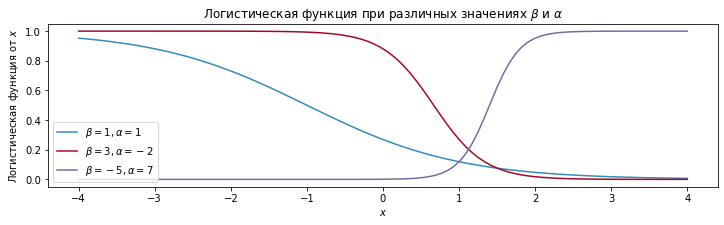

In [124]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$", color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$", color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$", color="#7A68A6")
plt.title(u"Логистическая функция при различных значениях $\\beta$ и $\\alpha$")
plt.xlabel("$x$")
plt.ylabel(u"Логистическая функция от $x$")
plt.legend(loc="lower left")
plt.show()

Моделирование в PyMC полета космического корабля «Челленджер».

In [125]:
import pymc as pm
# наши отфильтрованные данные
temperature = challenger_data[:, 0] # 0-я колонка данных
Damage = challenger_data[:, 1] # повреждение или нет? 1-я колонка данных

# Моделируем параметры β и α лог-й ф-ции. 
# Обратите внимание на "value=0". Я поясню это ниже.
beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)

@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta): # логистическая функция
    return 1.0 /(1. + np.exp(beta*t + alpha))

In [126]:
p.value

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [127]:
# Связываем вероятности "p" с данными наблюдений с помощью
# бернуллиевой случайной переменной.
observed = pm.Bernoulli("bernoulli_obs", p, value=Damage , observed=True)
model = pm.Model([observed, beta, alpha])
# Загадочный код, который я поясню в главе 3
map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

C:\ProgramData\Anaconda3\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 120000 of 120000 complete in 16.8 sec

In [132]:
alpha_samples = mcmc.trace('alpha')
alpha_samples

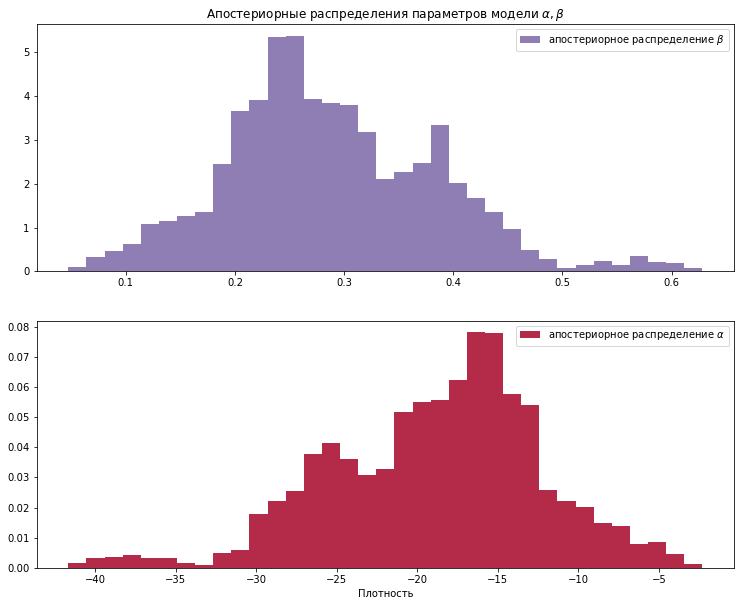

In [133]:
alpha_samples = mcmc.trace('alpha')[:, None]
# лучше, чтобы они были одномерными
beta_samples = mcmc.trace('beta')[:, None]

figsize(12.5, 10)
# Гистограммы выборок
#--------------------------Гистограмма 1----------------------------------
plt.subplot(211)
plt.title(r"Апостериорные распределения параметров модели $\alpha, \beta$")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"апостериорное распределение $\beta$", 
         color="#7A68A6", density=True)
plt.legend()
#---------------------------Гистограмма 2 --------------------------------
plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
        label=r"апостериорное распределение $\alpha$", color="#A60628",
        density=True)
plt.xlabel(u"Значение параметра")
plt.xlabel(u"Плотность")
plt.legend();

In [135]:
temperature.min(), temperature.max()

(53.0, 81.0)

Text(0.5, 0, 'Температура')

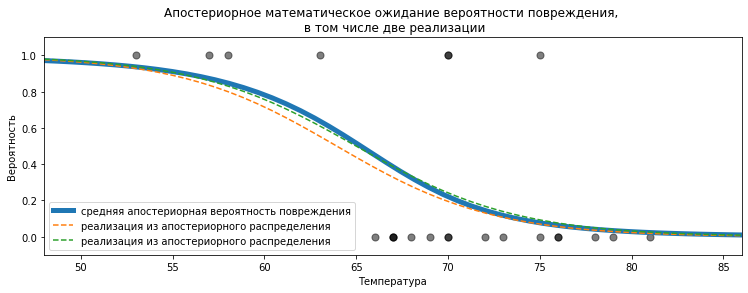

In [137]:
t = np.linspace(temperature.min()-5, temperature.max()+5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)
mean_prob_t = p_t.mean(axis=0)
figsize(12.5, 4)
plt.plot(t, mean_prob_t, lw=5, label=u"средняя апостериорная вероятность повреждения")
plt.plot(t, p_t[0, :], ls="--", label=u"реализация из апостериорного распределения")
plt.plot(t, p_t[-2, :], ls="--", label=u"реализация из апостериорного распределения")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.title(u"Апостериорное математическое ожидание вероятности повреждения, \n в том числе две реализации")
plt.legend(loc="lower left")
plt.ylim(-0.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel(u"Вероятность")
plt.xlabel(u"Температура")

In [141]:
p_t

array([[0.977, 0.972, 0.967, ..., 0.008, 0.007, 0.006],
       [0.976, 0.972, 0.967, ..., 0.024, 0.021, 0.018],
       [0.988, 0.986, 0.984, ..., 0.052, 0.045, 0.039],
       ...,
       [0.98 , 0.976, 0.972, ..., 0.012, 0.01 , 0.008],
       [0.98 , 0.976, 0.971, ..., 0.012, 0.01 , 0.008],
       [0.98 , 0.976, 0.971, ..., 0.012, 0.01 , 0.008]])

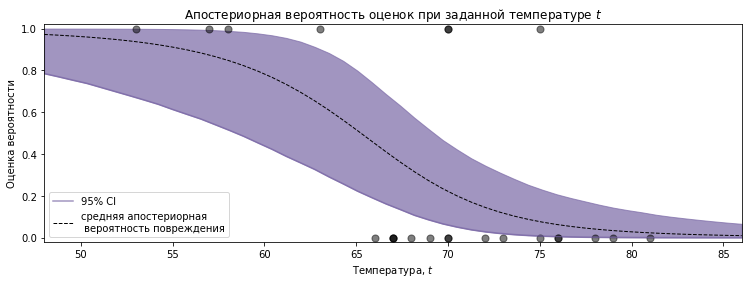

In [143]:
from scipy.stats.mstats import mquantiles
# Векторизованные 2,5%-ные квантили для байесовского
# доверительного интервала
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")
plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)
plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label= u"средняя апостериорная \n вероятность повреждения")
plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, Damage, color="k", s=50, alpha=0.5)
plt.xlabel(u"Температура, $t$")
plt.ylabel(u"Оценка вероятности")
plt.title(u"Апостериорная вероятность оценок при заданной температуре $t$");

2.2.12.  Что произошло в день катастрофы «Челленджера»

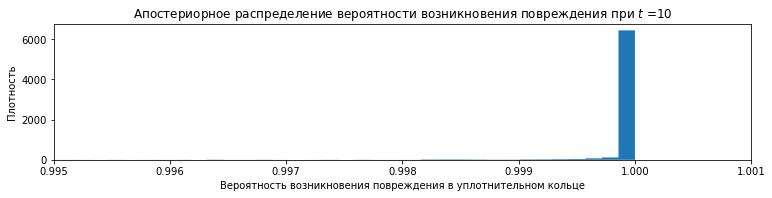

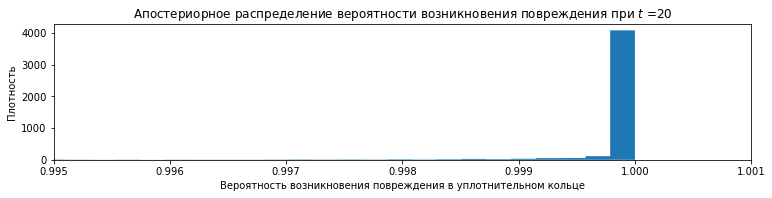

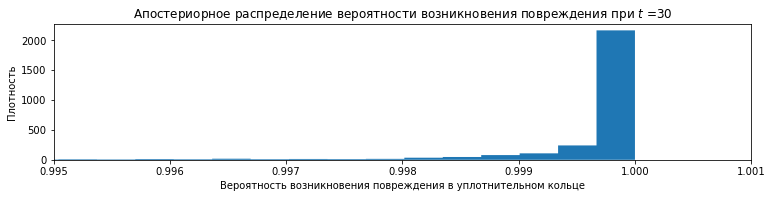

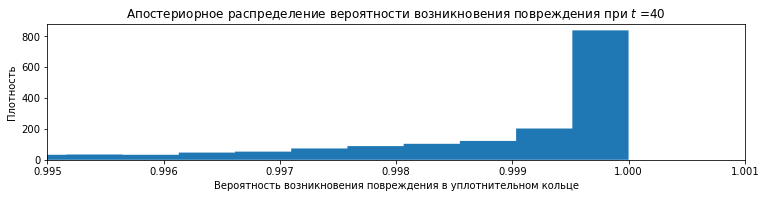

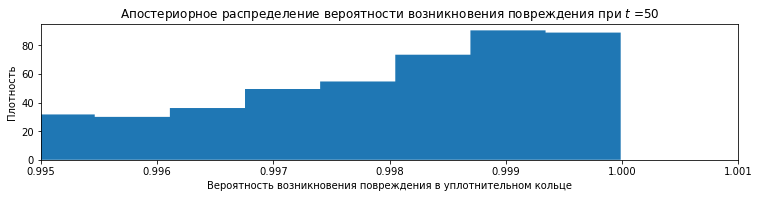

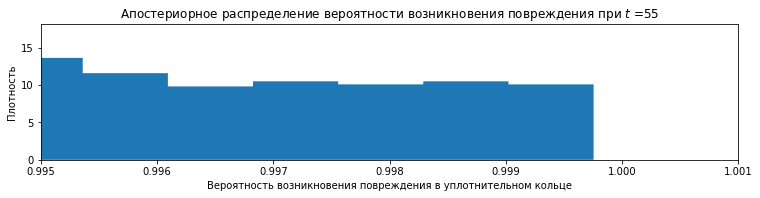

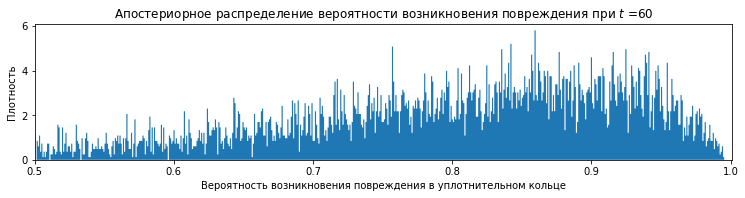

In [167]:
figsize(12.5, 2.5)

T1 = 10
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 20
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 30
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 40
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 50
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 55
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.995, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()
#----------------------------------------------------------------------
T1 = 60
prob_31 = logistic(T1, beta_samples, alpha_samples)
plt.xlim(0.5, 1.001)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Апостериорное распределение вероятности возникновения повреждения при $t$ ="+str(T1))
plt.ylabel("Плотность")
plt.xlabel("Вероятность возникновения повреждения в уплотнительном кольце")
plt.show()

# 2.3.  Адекватна ли наша модель?

 Рассмотрим крайние случаи

In [ ]:
Как можно проверить, не плохо ли модель удовлетворяет данным?

In [168]:
simulated_data = pm.Bernoulli("simulation_data", p)
simulated = pm.Bernoulli("bernoulli_sim", p)
N = 10000
mcmc = pm.MCMC([simulated, alpha, beta, observed])
mcmc.sample(N)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.8 sec

Форма массива имитаций:  (10000, 23)


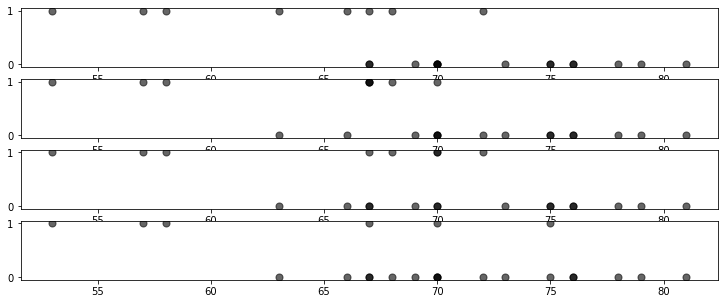

In [169]:
figsize(12.5, 5)
simulations = mcmc.trace("bernoulli_sim")[:].astype(int)
print ("Форма массива имитаций: ", simulations.shape)
plt.title(u"Имитационные наборы данных на основе апостериорных параметров")
figsize(12.5, 6)
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    plt.scatter(temperature, simulations[1000*i, :], color="k", s=50, alpha=0.6)

2.3.1.  Разделительные графики

In [178]:
posterior_probability = simulations.mean(axis=0)
print ("Набл. | Массив имитационных повреждений | Апостериорная вероятность повреждения | Возникший дефект")
for i in range(len(Damage)):
    print ("%s | %s | %.2f | %d" %\
          (str(i).zfill(2),str(simulations[:10,i])[:-1] + "...]".ljust(12),
           posterior_probability[i], D[i]))

Набл. | Массив имитационных повреждений | Апостериорная вероятность повреждения | Возникший дефект
00 | [1 1 0 1 0 0 1 1 1 0...]         | 0.47 | 0
01 | [0 0 0 0 0 0 0 0 0 0...]         | 0.26 | 1
02 | [0 0 1 0 0 0 1 1 0 0...]         | 0.31 | 0
03 | [1 1 0 0 0 1 1 0 1 0...]         | 0.35 | 0
04 | [0 1 1 0 0 1 0 0 0 0...]         | 0.41 | 0
05 | [1 0 1 0 0 0 0 0 0 0...]         | 0.18 | 0
06 | [0 0 0 0 0 0 0 0 0 0...]         | 0.15 | 0
07 | [0 0 0 0 0 0 0 0 0 0...]         | 0.26 | 0
08 | [1 1 1 1 0 1 1 1 0 1...]         | 0.87 | 1
09 | [1 1 1 0 1 1 1 1 1 1...]         | 0.63 | 1
10 | [0 0 0 1 0 0 0 1 0 0...]         | 0.25 | 1
11 | [0 0 0 0 0 0 0 0 0 0...]         | 0.05 | 0
12 | [0 0 0 0 0 0 1 0 0 1...]         | 0.41 | 0
13 | [1 0 0 0 1 1 1 1 1 0...]         | 0.94 | 1
14 | [1 0 1 1 1 0 1 0 0 0...]         | 0.42 | 0
15 | [0 0 1 0 0 0 0 0 0 0...]         | 0.10 | 0
16 | [0 1 1 1 0 0 0 0 0 0...]         | 0.26 | 0
17 | [0 0 0 0 0 0 0 0 0 0...]         | 0.03 | 0
18 | [0 0 0 0 0 0 0

In [179]:
ix = np.argsort(posterior_probability)
print ("Апостериорная вероятность повреждения | Возникший дефект")
for i in range(len(Damage)):
    print ("%.2f                                  | %d" %
          (posterior_probability[ix[i]], D[ix[i]]))

Апостериорная вероятность повреждения | Возникший дефект
0.03                                  | 0
0.04                                  | 0
0.05                                  | 0
0.08                                  | 0
0.08                                  | 0
0.10                                  | 0
0.10                                  | 1
0.15                                  | 0
0.18                                  | 0
0.25                                  | 1
0.26                                  | 0
0.26                                  | 0
0.26                                  | 1
0.31                                  | 0
0.35                                  | 0
0.41                                  | 0
0.41                                  | 0
0.42                                  | 0
0.47                                  | 0
0.63                                  | 1
0.84                                  | 1
0.87                                  | 1
0.94               

In [210]:
def separation_plot( p, y, **kwargs ):
    """
    This function creates a separation plot for logistic and probit classification. 
    See http://mdwardlab.com/sites/default/files/GreenhillWardSacks.pdf
    
    p: The proportions/probabilities, can be a nxM matrix which represents M models.
    y: the 0-1 response variables.
    
    """    
    assert p.shape[0] == y.shape[0], "p.shape[0] != y.shape[0]"
    n = p.shape[0]

    try:
        M = p.shape[1]
    except:
        p = p.reshape( n, 1 )
        M = p.shape[1]

    colors_bmh = np.array( ["#eeeeee", "#348ABD"] )


    fig = plt.figure( )
    
    for i in range(M):
        ax = fig.add_subplot(M, 1, i+1)
        ix = np.argsort( p[:,i] )
        #plot the different bars
        bars = ax.bar( np.arange(n), np.ones(n), width=1.,
                color = colors_bmh[ y[ix].astype(int) ], 
                edgecolor = 'none')
        ax.plot( np.arange(n+1), np.append(p[ix,i], p[ix,i][-1]), "k",
                 linewidth = 1.,drawstyle="steps-post" )
        #create expected value bar.
        ax.vlines( [(1-p[ix,i]).sum()], [0], [1] )
        plt.xlim( 0, n)
        
    plt.tight_layout()
    
    return

<ipython-input-210-f2d3b66cd5bd>:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()
<ipython-input-210-f2d3b66cd5bd>:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()
<ipython-input-210-f2d3b66cd5bd>:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()
<ipython-input-210-f2d3b66cd5bd>:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


Text(0.5, 1.0, 'Модель неизменных предсказаний')

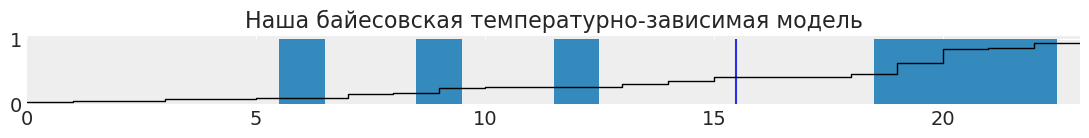

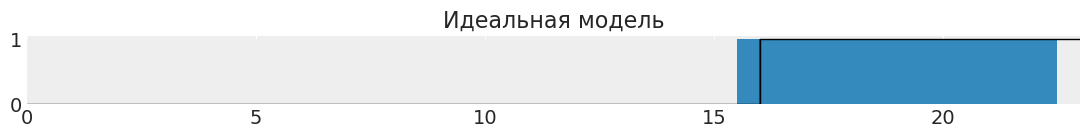

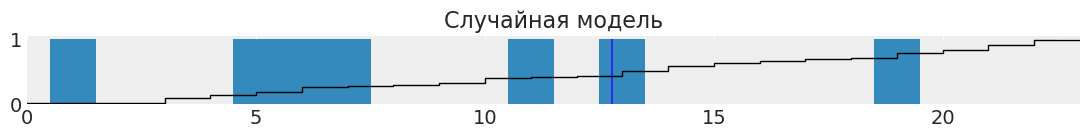

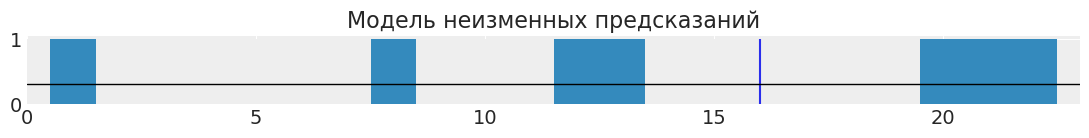

In [211]:
figsize(11, 1.25)
# Температурно-независимая модель
separation_plot(posterior_probability, Damage)
plt.title("Наша байесовская температурно-зависимая модель")
# Идеальная модель (вероятность повреждения соответствует тому,
# возникло оно в реальности или нет)
p = Damage
separation_plot(p, Damage)

plt.title(u"Идеальная модель")
# random predictions
p = np.random.rand(23)
separation_plot(p, Damage)
plt.title(u"Случайная модель")
# Константная модель
constant_prob = 7./23*np.ones(23)
separation_plot(constant_prob, Damage)
plt.title(u"Модель неизменных предсказаний")